### Problem Statement :
Creating two models to Predict Sale Price for future houses, by using historical house Sales data.



In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Loading the Dataset

In [2]:
df = pd.read_csv('dataset (1).csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### Inspecting the Dataset

In [3]:
df.shape

(2930, 82)

In [4]:
df.describe([0.25,0.50,0.75,0.99])

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
99%,2900.71000,9.232750e+08,190.000000,135.610000,32988.920000,10.000000,9.000000,2008.000000,2009.000000,770.820000,1634.880000,874.440000,1776.160000,2197.200000,2286.810000,1399.100000,152.520000,2930.660000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1019.160000,500.710000,284.130000,264.000000,144.000000,259.710000,0.000000,971.000000,12.000000,2010.000000,456666.370000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.00

In [5]:
# Checking the percentage of Null values in all the columns
## Here we will check the percentage of nan values present in each feature
## 1 -Make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]
## 2- print the feature name and the percentage of missing values
x = {}
for feature in features_with_na:
    x[feature] = np.round(df[feature].isnull().mean()*100, 2)
p = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
print(p)

{'PoolQC': 99.56, 'MiscFeature': 96.38, 'Alley': 93.24, 'Fence': 80.48, 'FireplaceQu': 48.53, 'LotFrontage': 16.72, 'GarageYrBlt': 5.43, 'GarageFinish': 5.43, 'GarageQual': 5.43, 'GarageCond': 5.43, 'GarageType': 5.36, 'BsmtExposure': 2.83, 'BsmtFinType2': 2.76, 'BsmtQual': 2.73, 'BsmtCond': 2.73, 'BsmtFinType1': 2.73, 'MasVnrType': 0.78, 'MasVnrArea': 0.78, 'BsmtFullBath': 0.07, 'BsmtHalfBath': 0.07, 'BsmtFinSF1': 0.03, 'BsmtFinSF2': 0.03, 'BsmtUnfSF': 0.03, 'TotalBsmtSF': 0.03, 'Electrical': 0.03, 'GarageCars': 0.03, 'GarageArea': 0.03}


In [6]:
null_perct = pd.DataFrame({'feature': list(p.keys()), 'null%': list(p.values())}) 
null_perct.head(10)

,feature,null%
0,PoolQC,99.56
1,MiscFeature,96.38
2,Alley,93.24
3,Fence,80.48
4,FireplaceQu,48.53
5,LotFrontage,16.72
6,GarageYrBlt,5.43
7,GarageFinish,5.43
8,GarageQual,5.43
9,GarageCond,5.43


27 features have missing values, out of which 5 features have more than 45% missing values.

#### Exploratory Data Analysis

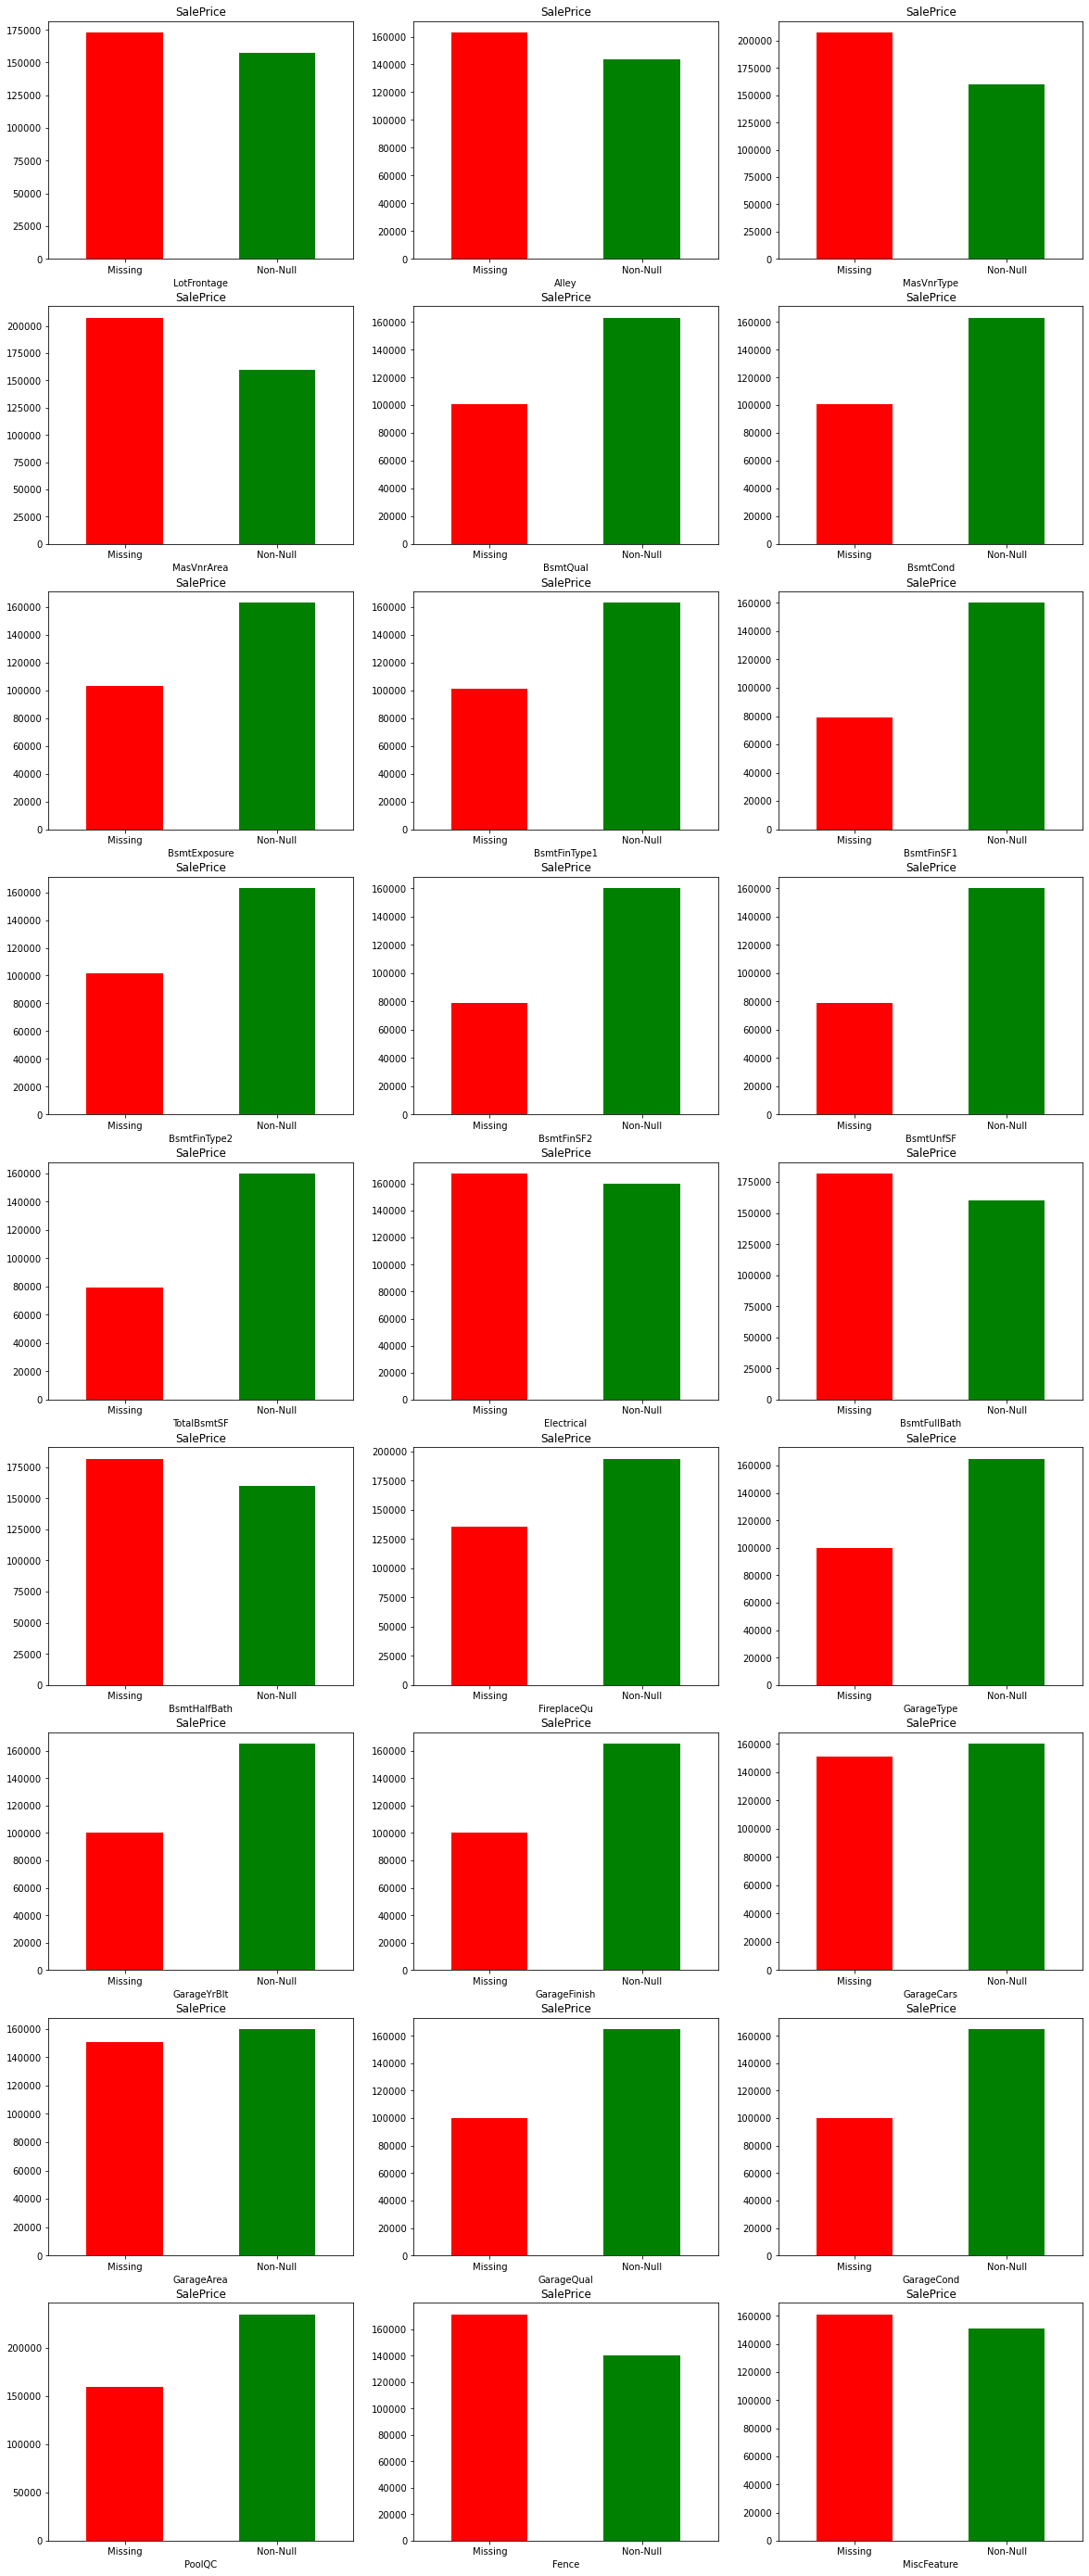

In [7]:
# Checking if NaN Values have any impact on the Sale Price or not
for feature in features_with_na:
    df_copy = df.copy()
    
fig,axs= plt.subplots(9,3,figsize=(20,50),squeeze=True)  
for i,ax in zip(features_with_na,axs.flatten()):  
    # let's make a variable that indicates if the observation is missing or not
    df_copy[i] = np.where(df_copy[i].isnull(), 'Missing', 'Non-Null') 
    df_copy.groupby(i)['SalePrice'].median().plot.bar(color = list('rg'),rot=0,ax=ax,subplots=True)
    
plt.show()

The NaN values have some impact on the Sale Price. We will handle these missing values in the feature engineering section.

In [8]:
# Checking the number of numerical features and the number of categorical features
num_col = []
cat_col = []
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
print('There are', len(num_col) ,'numerical features in the dataset')
print('There are', len(cat_col), 'categorical features in the dataset')

There are 39 numerical features in the dataset
There are 43 categorical features in the dataset


Text(0.5, 1.0, 'House Price vs YearSold')

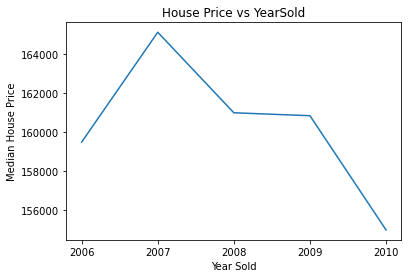

In [9]:
# Checking if the median price changes with the year sold
df['YrSold'] = df['YrSold'].astype('int')
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.xticks([2006,2007,2008,2009,2010])
plt.title("House Price vs YearSold")

We can see that the average price decreased significantly after 2007-2008 housing bubble crash. Thus the year in which the house was sold has a considerable effect on the sale price.

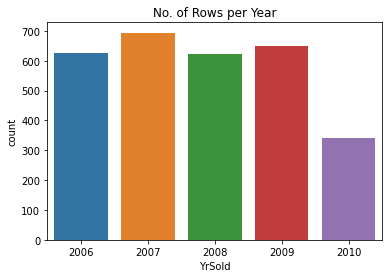

In [10]:
plt.title('No. of Rows per Year')
sns.countplot(x=df['YrSold']);

We can see that the average price decreased significantly after 2007-2008 housing bubble crash. Thus the year in which the house was sold has a considerable effect on the sale price

In [11]:
# Extracting the Year Features from the Dataset and then checking how the price varies with respect to the age of the estate
yr_cols = []
for i in df.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        yr_cols.append(i)
print('List of features with Year are:')
print(yr_cols)

List of features with Year are:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


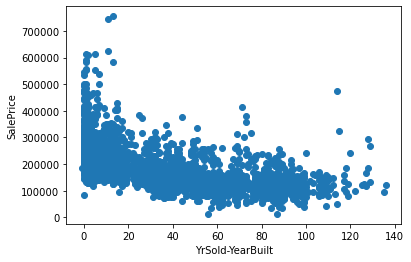

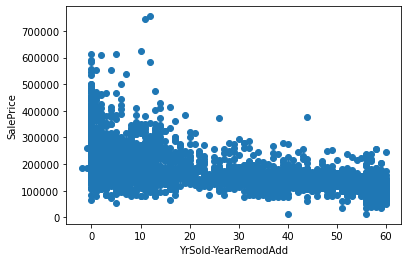

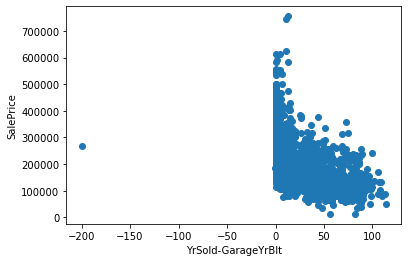

In [12]:
# Comparing the Age of the Building / Renovated Building / Garage with the Sold Price
for feature in yr_cols:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel('YrSold'+'-'+feature)
        plt.ylabel('SalePrice')
        plt.show()

It looks like that the new properties built are costlier than the old properties built.

In [13]:
df = df[df['YrSold']-df['GarageYrBlt']>0]

In [14]:
# Dropping ID Columns from dataset since it is useless in the prediction usecase
df.drop(['PID','Order'], axis=1, inplace=True)

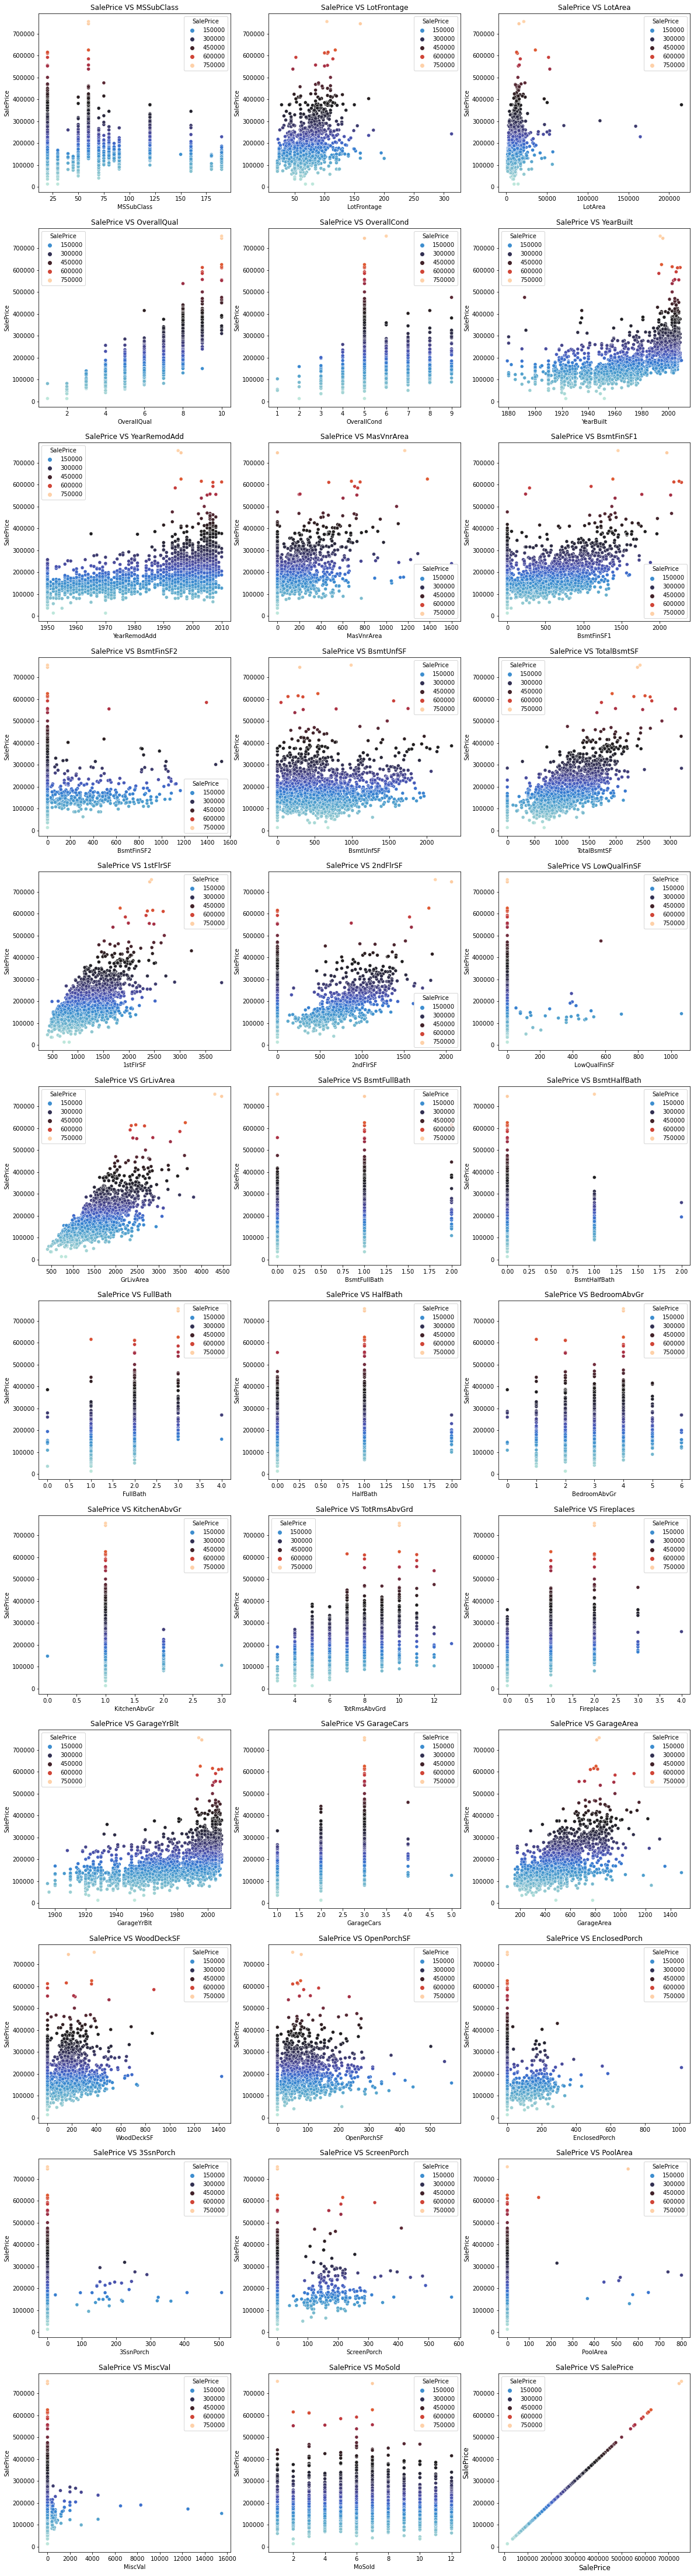

In [15]:
#Visualising numerical predictor variables with Target Variables
df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

Observations from the above plot:-
- New properties are costlier than older properties. 
- GRLiving Area has a direct correlation with the price of the property.
- Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.
- Month sold has no effect on the price.

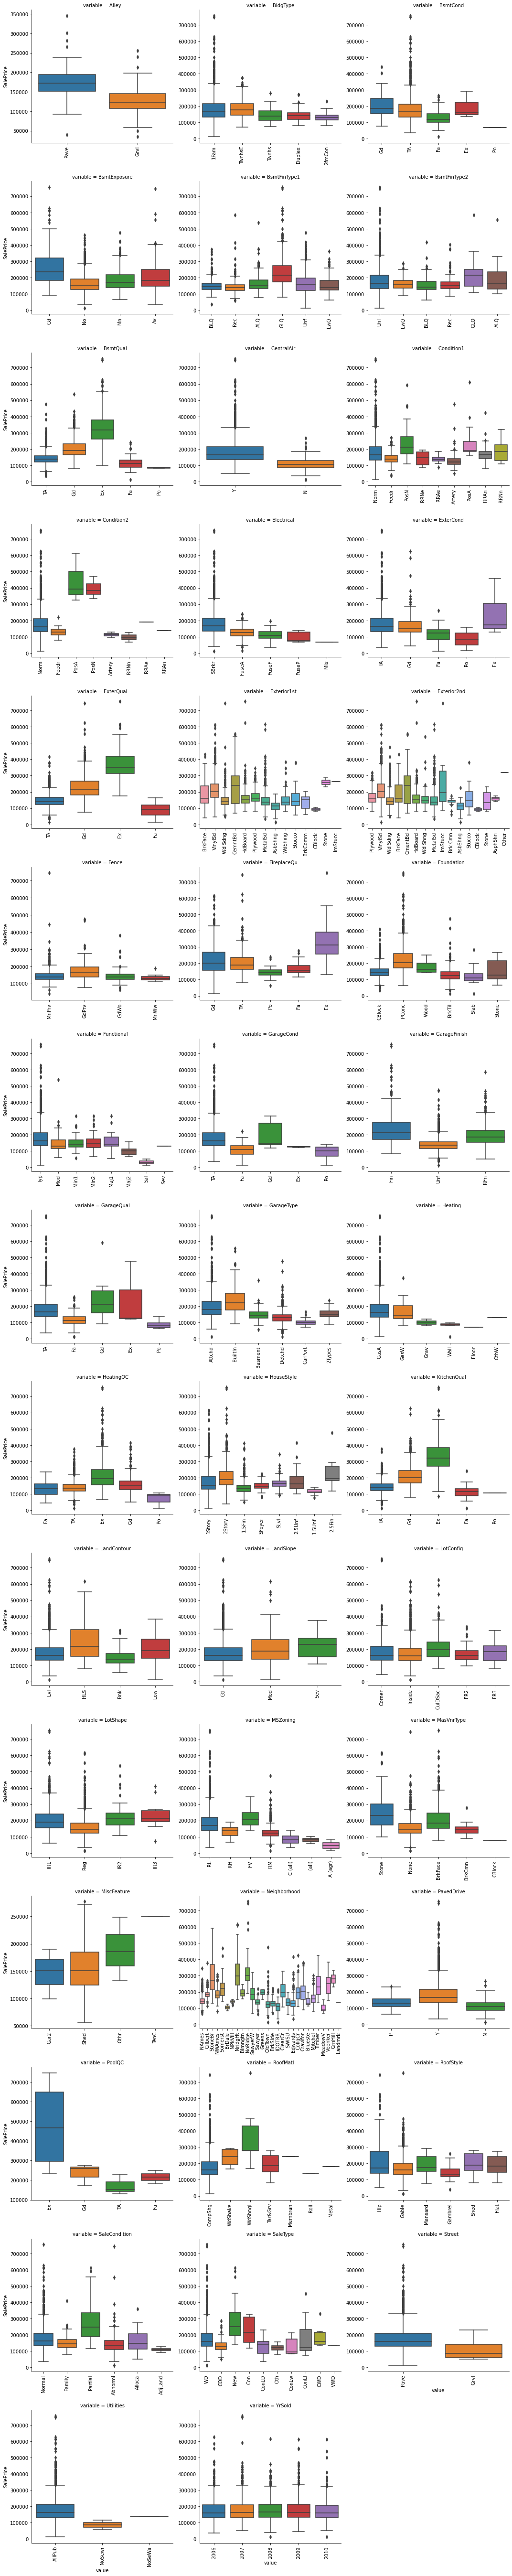

In [16]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

There are a few outliers which we handle in the feature engineering section by capping them to a lower percentile.
From the above box plots we see that:-
- Paved alleys properties demand a higher price.
- Houses where the basement quality is good and excellent are sold at higher prices compared to others.
- Houses with good and excellent garages are sold at higher prices.
- Houses with good quality kitchens also impact the price in a positive way.

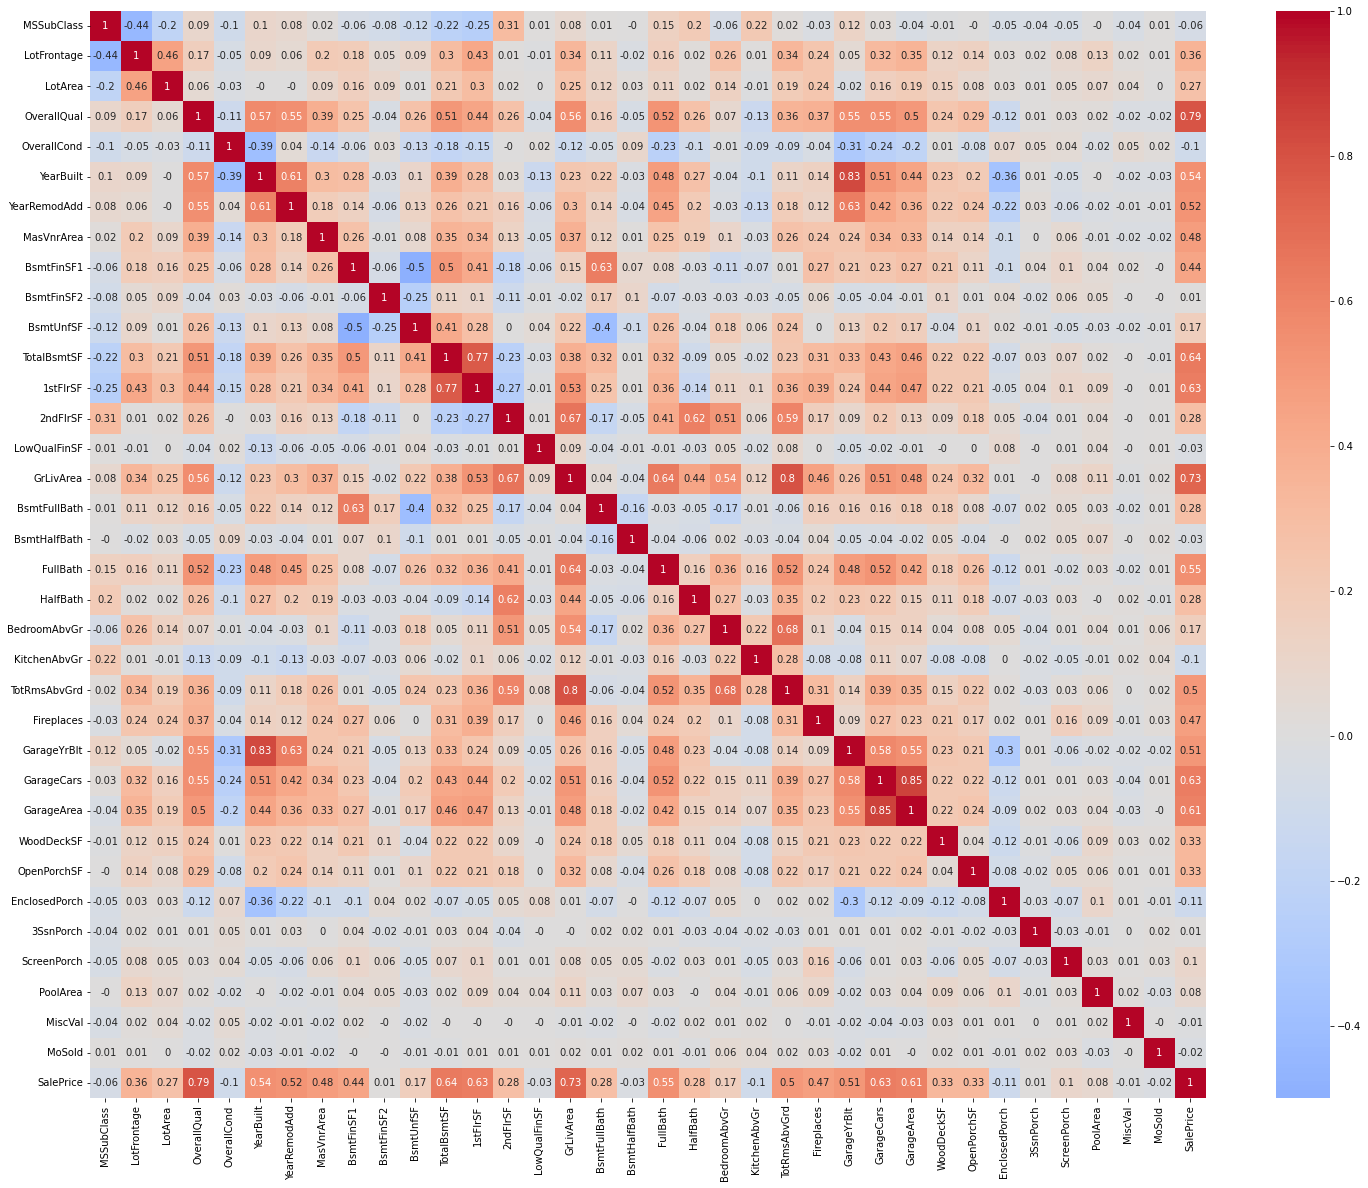

In [17]:
# Checking the correlation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

We can see that there are highly correlated features. We will remove the highly corelated attributes after a few steps.

#### Data Preparation

In [18]:
# Creating a new Column to determine the age of the property
df['age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']
#Dropping 'GarageYrBlt' as it is highly correlated with 'YearBuilt'
df.drop('GarageYrBlt',axis=1,inplace=True)

In [19]:
# We need to convert some Numerical Column to String columns since they are categorical variables. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2619 non-null   int64  
 1   MSZoning       2619 non-null   object 
 2   LotFrontage    2143 non-null   float64
 3   LotArea        2619 non-null   int64  
 4   Street         2619 non-null   object 
 5   Alley          167 non-null    object 
 6   LotShape       2619 non-null   object 
 7   LandContour    2619 non-null   object 
 8   Utilities      2619 non-null   object 
 9   LotConfig      2619 non-null   object 
 10  LandSlope      2619 non-null   object 
 11  Neighborhood   2619 non-null   object 
 12  Condition1     2619 non-null   object 
 13  Condition2     2619 non-null   object 
 14  BldgType       2619 non-null   object 
 15  HouseStyle     2619 non-null   object 
 16  OverallQual    2619 non-null   int64  
 17  OverallCond    2619 non-null   int64  
 18  YearBuil

In [20]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age,garage_age,remodel_age
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,50,50.0,50
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,49,49.0,49
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,52,52.0,52
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,42,42.0,42
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,13,13.0,12


#### Handling missing values
Instead of dropping rows or columns, we impute the NaN values with None, Default or similar values, since by intuion it is assumed that when a certain feature is missing in that property, it is left blank during data collection


In [21]:
# getting list of columns with Null Values again
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[round(df.isnull().sum()/len(df.index),2) > 0 ] )

PoolQC          99.54
MiscFeature     96.30
Alley           93.62
Fence           79.27
FireplaceQu     46.66
LotFrontage     18.17
BsmtExposure     2.60
BsmtFinType2     2.56
BsmtFinType1     2.52
BsmtCond         2.52
BsmtQual         2.52
MasVnrType       0.53
MasVnrArea       0.53
dtype: float64


In [22]:
nan_list=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']       
for i in nan_list:
    df[i] = df[i].fillna('None')
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())     
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)    

In [23]:
# getting list of columns with Null Values again
print(round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),5) > 0 ] )

BsmtFullBath    0.07637
BsmtHalfBath    0.07637
Electrical      0.03818
TotalBsmtSF     0.03818
BsmtFinSF2      0.03818
BsmtUnfSF       0.03818
BsmtFinSF1      0.03818
dtype: float64


In [24]:
# Filling the Electrical 0.07% rows with the mode
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
# Filling the Electrical 0.07% rows with the mode
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
# Filling the Electrical 0.04% rows with the mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0) 
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0) 
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0) 
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0) 

In [25]:
round(df.isnull().sum()/len(df.index)*100,10).sort_values(ascending=False)

MSSubClass       0.0
GarageQual       0.0
GarageCars       0.0
GarageFinish     0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
GarageArea       0.0
GarageCond       0.0
MSZoning         0.0
PavedDrive       0.0
garage_age       0.0
age              0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolQC           0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle   

All the missing values have been taken care of.

#### Feature Engineering

In [26]:
print(df['Utilities'].value_counts())
print(df['Street'].value_counts())
print(df['PoolQC'].value_counts())

AllPub    2616
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
Pave    2609
Grvl      10
Name: Street, dtype: int64
None    2607
Ex         4
Gd         3
TA         3
Fa         2
Name: PoolQC, dtype: int64


Some columns have above 99% same values, thus it does not play any part on predicting the target variable

In [27]:
# Trying to remove redundant features
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [28]:
redundant_features = redundant_feature(df)
redundant_features

['Street', 'Utilities', 'Condition2', 'PoolArea', 'PoolQC']

But among the listed features above there is a significant impact of Saleprice on ‘Condition2’ variable and ‘PoolQC’ variable (can be seen from the above bar plots). Hence, I did not drop these columns.


In [29]:
redundant_features = ['Street', 'Utilities', 'PoolArea']

Dropping these features since they have more than 99% of a single category and thus play no part in the prediction

In [30]:
df.drop(redundant_features,axis=1,inplace=True)

In [31]:
df.shape

(2619, 79)

In [32]:
# Removing outliers to make the model more robust
# From EDA we see that Living Area, Garage Area, Basement Area and Lot Area. Removing outliers from these columns 

def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df = drop_outliers(df)
df.shape

(2615, 79)

4 outliers have been removed

In [33]:
#Creating some new features based on the existing features
#Vintage house with remodified version of it plays a important role in prediction(i.e. high price )
df['YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'])
# Creating derived column for total number of bathrooms column
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
#Creating derived column for total porch area 
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

In [34]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)

In [35]:
# Checking the shape after dropping all co-related columns
df.shape

(2615, 340)

In [36]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select lower triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6) and column!='SalePrice']

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [37]:
# Checking the shape after dropping all co-related columns
df.shape

(2615, 253)

In [38]:
X = df.drop('SalePrice',axis = 1)
y = df['SalePrice']

In [39]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

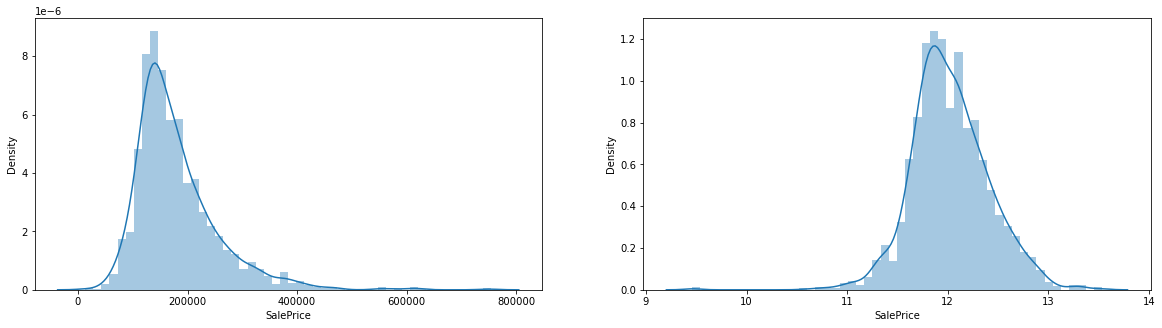

In [40]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(y_train,ax=ax[0])
sns.distplot(np.log(y_train),ax=ax[1])

The Data is right-skewed. Hence we transform it to make it more gaussian.

In [41]:
y_train =  np.log(y_train)
y_test = np.log(y_test)

The target variable is now transformed

In [42]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

#### Ridge Regression

Fitting 10 folds for each of 28 candidates, totalling 280 fits


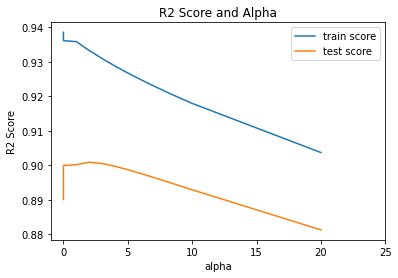

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8921507077078402
The MSE of the model on the test dataset for optimum alpha is 0.014037766236402377


In [43]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [44]:
#Displaing the co-efficients of the model
ridge_coeff = pd.DataFrame({'feature': X_train_rfe.columns, 'importance': ridge_coef}) 
ridge_coeff.sort_values(by=['importance'], ascending=False,inplace=True) 
ridge_coeff.head(50)

,feature,importance
2,OverallQual,0.477122
9,TotalBsmtSF,0.433582
10,2ndFlrSF,0.368565
3,OverallCond,0.341514
6,BsmtFinSF1,0.336147
1,LotArea,0.326824
65,Neighborhood_GrnHill,0.285984
16,GarageCars,0.225318
4,YearBuilt,0.180504
8,BsmtUnfSF,0.172966


<AxesSubplot:xlabel='importance', ylabel='feature'>

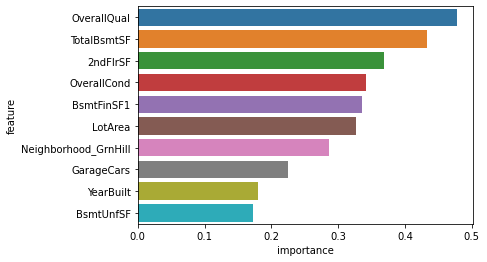

In [45]:
sns.barplot(data=ridge_coeff.head(10), x='importance', y='feature')

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
params = {"max_depth":[15,20,25], "n_estimators":[25,50,75,100]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =-1)
rf_reg.fit(X_train, y_train)

print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

RandomForestRegressor(max_depth=20, n_estimators=75)


In [47]:
rf1 = RandomForestRegressor(random_state=42,max_depth=20,n_jobs=-1,n_estimators=75)

In [48]:
rf1.fit(X_train, y_train)
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

In [49]:
print('The R2 Score of the model on the test dataset for optimal hyperparameters is',r2_score(y_test, y_pred_test))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_pred_test))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

The R2 Score of the model on the test dataset for optimal hyperparameters is 0.8599015086212572
The MSE of the model on the test dataset for optimum alpha is 0.018235352594802266
Root Mean Square Error test = 0.13503833750014205


In [50]:
#Displaing the co-efficients of the model
rand_for = pd.DataFrame({'feature': X_train.columns, 'importance': rf1.feature_importances_}) 
rand_for.sort_values(by=['importance'], ascending=False,inplace=True) 
rand_for.head(10)

,feature,importance
2,OverallQual,0.592725
16,GarageCars,0.083130
9,TotalBsmtSF,0.058210
1,LotArea,0.041669
10,2ndFlrSF,0.028428
6,BsmtFinSF1,0.019970
4,YearBuilt,0.016298
15,Fireplaces,0.011695
3,OverallCond,0.010764
144,BsmtQual_Ex,0.010092


<AxesSubplot:xlabel='importance', ylabel='feature'>

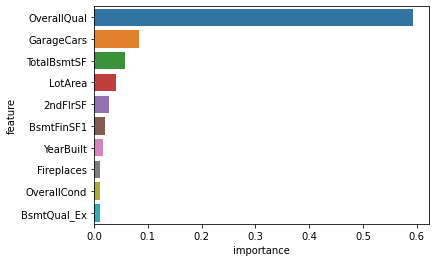

In [51]:
sns.barplot(data=rand_for.head(10), x='importance', y='feature')

In [52]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF
112,Exterior1st_BrkFace,inf
117,Exterior1st_MetalSd,inf
215,PoolQC_TA,inf
214,PoolQC_None,inf
213,PoolQC_Gd,inf
212,PoolQC_Fa,inf
211,PoolQC_Ex,inf
116,Exterior1st_ImStucc,inf
189,Functional_Typ,inf
187,Functional_Sal,inf


In [53]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

In [54]:
X_train_rfe2.shape

(1961, 187)

Now we have all the columns which do not suffer from multicolinearity

Fitting 10 folds for each of 28 candidates, totalling 280 fits


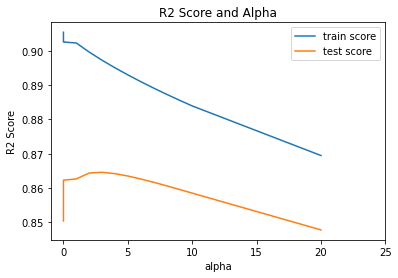

The optimum alpha is 3
The R2 Score of the model on the test dataset for optimum alpha is 0.8605052649622315
The MSE of the model on the test dataset for optimum alpha is 0.018156767096481317


In [55]:
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [56]:
#Displaing coefficients of the model
ridge_coeff2 = pd.DataFrame({'feature': X_train_rfe2.columns, 'importance': ridge_coef2}) 
ridge_coeff2.sort_values(by=['importance'], ascending=False,inplace=True) 
ridge_coeff2.head(20)

,feature,importance
2,OverallQual,0.655276
1,LotArea,0.375136
11,GarageCars,0.305728
3,OverallCond,0.263910
59,Neighborhood_GrnHill,0.247587
10,Fireplaces,0.191559
8,BedroomAbvGr,0.186022
0,LotFrontage,0.180975
13,OpenPorchSF,0.172160
12,WoodDeckSF,0.155546


<AxesSubplot:xlabel='importance', ylabel='feature'>

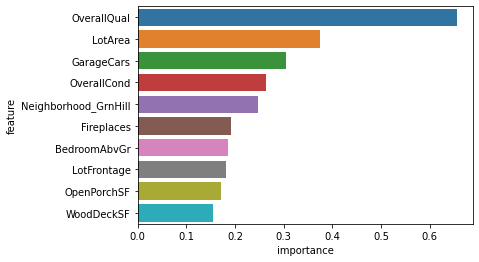

In [57]:
sns.barplot(data=ridge_coeff2.head(10), x='importance', y='feature')

The Top 10 features impacting the price of the property is stated above.

#### Lasso
Since Lasso helps in feature reduction (as the coefficient value of some of the features become zero), Lasso has a better edge over Ridge and should be used as the final model.

In [58]:
# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.8429023163239768
The MSE of the model on the test dataset for optimum alpha is 0.020447983596871642


Fitting 10 folds for each of 11 candidates, totalling 110 fits


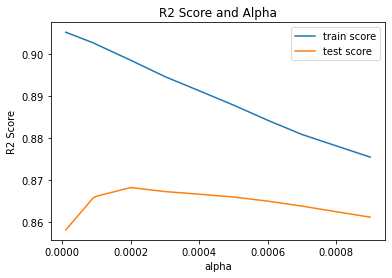

The optimum alpha is 0.0002
The R2 Score of the model on the test dataset for optimum alpha is 0.8516757845275291
The MSE of the model on the test dataset for optimum alpha is 0.019306020649258217


In [59]:
# Building a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The top 10 features of the final Lasso model is stated below.

In [60]:
#Displaing coefficients of the model
lasso_coeff2 = pd.DataFrame({'feature': X_train_rfe2.columns, 'importance': lasso_coef2}) 
lasso_coeff2.sort_values(by=['importance'], ascending=False,inplace=True) 
lasso_coeff2.head(10)

,feature,importance
2,OverallQual,0.804362
1,LotArea,0.524935
59,Neighborhood_GrnHill,0.416305
11,GarageCars,0.322160
3,OverallCond,0.274362
10,Fireplaces,0.212871
8,BedroomAbvGr,0.193537
13,OpenPorchSF,0.176841
0,LotFrontage,0.162187
12,WoodDeckSF,0.146966


<AxesSubplot:xlabel='importance', ylabel='feature'>

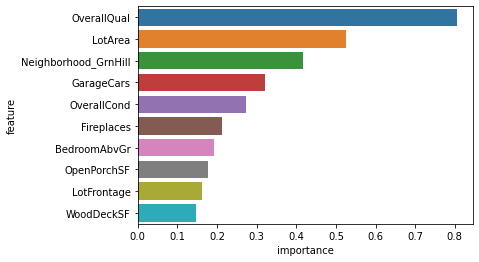

In [61]:
sns.barplot(data=lasso_coeff2.head(10), x='importance', y='feature')

In [62]:
from sklearn.decomposition import PCA

X_train_reduced = PCA(n_components= 11).fit_transform(X_train)
X_test_reduced = PCA(n_components= 11).fit_transform(X_test)
X_train_reduced = DataFrame(X_train_reduced)
X_test_reduced = DataFrame(X_test_reduced)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


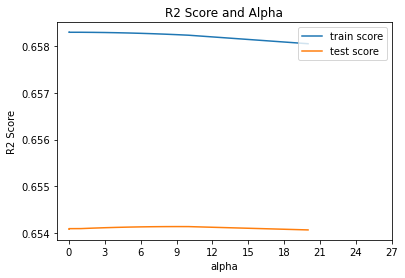

The optimum alpha is 9
The R2 Score of the model on the test dataset for optimum alpha is 0.6058410914031852
The MSE of the model on the test dataset for optimum alpha is 0.05130409760954741


In [63]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_reduced, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,3))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_reduced,y_train)
ridge_coef = ridge_final.coef_
y_test_pred_pca = ridge_final.predict(X_test_reduced)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred_pca))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred_pca))

In [64]:
X_train.shape

(1961, 252)